In [2]:
sc()

''

In [3]:
import pandas as pd

In [29]:
feature_dict = {i:label for i,label in zip(
                range(8),
                  ('Name',
                    'MPG',
                  'Cylinders',
                  'Displacement',
                  'Horsepower',
                  'Weight',
                  'Acceleration',
                  'Model',
                  'Origin'
                  ))}

In [146]:
df = pd.io.parsers.read_csv(
    filepath_or_buffer='cars.csv',
    header=None,
    sep=';',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end
del df['Name']
#deleting first 2 rows which were type description and labels
df = df.drop(df.index[0])
df = df[df.MPG != "DOUBLE"]
#making columns needed in mathematical analysis to floats (were originally strings)
df['MPG'] = df['MPG'].astype(float)
df['Cylinders'] = df['Cylinders'].astype(float)
df['Displacement'] = df['Displacement'].astype(float)
df['Horsepower'] = df['Horsepower'].astype(float)
df['Weight'] = df['Weight'].astype(float)
df['Acceleration'] = df['Acceleration'].astype(float)
df['Model'] = df['Model'].astype(float)
df.reset_index(drop=True, inplace=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,class label
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,US
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,US
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,US
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,US
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,US
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,US
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,US
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,US
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,US
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,US


In [147]:
from sklearn.preprocessing import LabelEncoder

X = df[[0,1,2,3]].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'US', 2: 'Europe', 3:'Japan'}


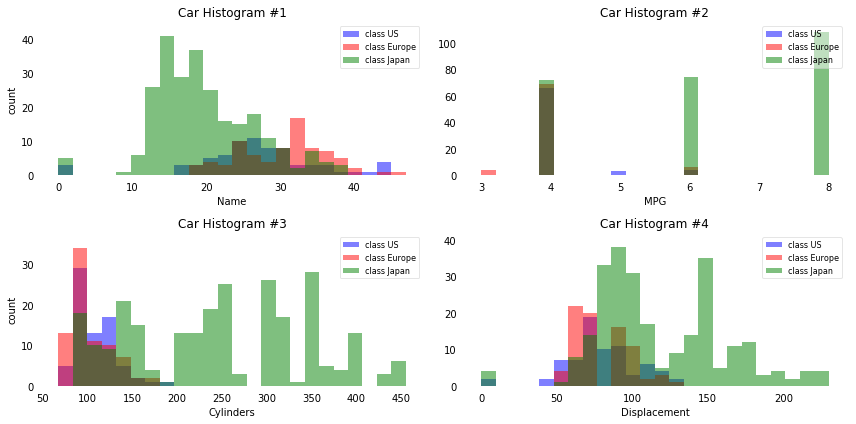

In [149]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  
    # set bin sizes
    #start at 2 to skip column headers and row[[0]] which are column types
    min_b = math.floor(np.min(X[2:,cnt]))
    max_b = math.ceil(np.max(X[2:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                color=col,
                label='class %s' %label_dict[lab],
                bins=bins,
                alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Car Histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

In [150]:
#LVD STEPS START HERE

In [151]:
#STEP 1

In [154]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))


Mean Vector class 1: [  26.7452    4.1507  109.4658   78.7808]

Mean Vector class 2: [  30.4506    4.1013  102.7089   79.8354]

Mean Vector class 3: [  19.6882    6.2835  247.935   118.0118]



In [155]:
#STEP 2

In [156]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

('within-class Scatter Matrix:\n', array([[  2.0395e+04,  -2.4347e+03,  -1.5063e+05,  -6.7298e+04],
       [ -2.4347e+03,   7.4412e+02,   4.0093e+04,   1.5200e+04],
       [ -1.5063e+05,   4.0093e+04,   2.5398e+06,   9.8249e+05],
       [ -6.7298e+04,   1.5200e+04,   9.8249e+05,   5.2264e+05]]))


In [157]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

('between-class Scatter Matrix:\n', array([[  8.1942e+03,  -1.8507e+03,  -1.2223e+05,  -3.2895e+04],
       [ -1.8507e+03,   4.4313e+02,   2.9155e+04,   7.9379e+03],
       [ -1.2223e+05,   2.9155e+04,   1.9187e+06,   5.2201e+05],
       [ -3.2895e+04,   7.9379e+03,   5.2201e+05,   1.4234e+05]]))


In [158]:
#STEP 3

In [159]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.1393]
 [-0.9805]
 [ 0.0923]
 [-0.1036]]
Eigenvalue 1: 9.75e-01

Eigenvector 2: 
[[-0.4295]
 [-0.9021]
 [-0.0027]
 [-0.0419]]
Eigenvalue 2: 4.28e-02

Eigenvector 3: 
[[-0.0606]
 [-0.9943]
 [-0.0124]
 [ 0.0869]]
Eigenvalue 3: -4.16e-16

Eigenvector 4: 
[[ 0.0321]
 [-0.9991]
 [ 0.0221]
 [-0.0179]]
Eigenvalue 4: 1.68e-15


In [160]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [161]:
#STEP 4

In [162]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])


Eigenvalues in decreasing order:

0.975014388104
0.0427992820074
1.67851188613e-15
4.15849106508e-16


In [163]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 95.79%
eigenvalue 2: 4.21%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [164]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

('Matrix W:\n', array([[-0.1393, -0.4295],
       [-0.9805, -0.9021],
       [ 0.0923, -0.0027],
       [-0.1036, -0.0419]]))


In [165]:
#STEP 5

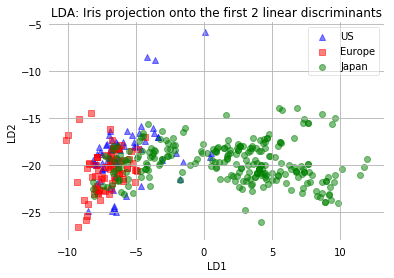

In [169]:
X_lda = X.dot(W)
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()